In [1]:
from google.colab import files
import pandas as pd
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
warnings.filterwarnings('ignore')

In [2]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving income.csv to income.csv


In [3]:
income_df = pd.read_csv(filename)

In [4]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [5]:
income_df

,Name,Age,Income
0,Diya Nayak,27,70000
1,Shravan Omayya,29,90000
2,Shivam Pandey,29,61000
3,Bhakti Paradkar,28,60000
4,Omkar Pashte,42,150000
5,Akshata Patil,39,155000
6,Shubham Pawar,41,160000
7,Sumit Phadke,38,162000
8,Niraj Phafat,36,156000
9,Siddhant Puthran,35,130000


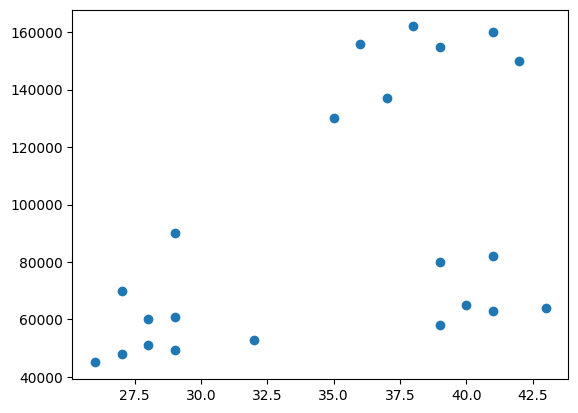

In [6]:
plt.scatter(income_df.Age, income_df.Income)

In [7]:
kmean = KMeans(n_clusters=3)
kmean

KMeans(n_clusters=3)

### fit_predict

### fit -> The model learns the pattern in Age and Income (finding clusters).
### predict -> It then assigns each data point a cluster label.

In [8]:
y_pred = kmean.fit_predict(income_df[['Age', 'Income']])

In [9]:
y_pred

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [10]:
income_df['Cluster'] = y_pred

In [11]:
income_df

,Name,Age,Income,Cluster
0,Diya Nayak,27,70000,0
1,Shravan Omayya,29,90000,2
2,Shivam Pandey,29,61000,0
3,Bhakti Paradkar,28,60000,0
4,Omkar Pashte,42,150000,1
5,Akshata Patil,39,155000,1
6,Shubham Pawar,41,160000,1
7,Sumit Phadke,38,162000,1
8,Niraj Phafat,36,156000,1
9,Siddhant Puthran,35,130000,1


### For visualising the clusters

separate 3 clusters into 3 dataframes-

In [12]:
df1 = income_df[income_df.Cluster == 0]
df2 = income_df[income_df.Cluster == 1]
df3 = income_df[income_df.Cluster == 2]

In [13]:
df1

,Name,Age,Income,Cluster
0,Diya Nayak,27,70000,0
2,Shivam Pandey,29,61000,0
3,Bhakti Paradkar,28,60000,0
11,Raj Rathod,26,45000,0
12,Sujit Sahu,27,48000,0
13,Mitali Salunkhe,28,51000,0
14,Siddhi Shah,29,49500,0
15,Ashish Sharma,32,53000,0
16,Azad sharma,40,65000,0
17,Hardik Shetty,41,63000,0


In [15]:
df2

,Name,Age,Income,Cluster
4,Omkar Pashte,42,150000,1
5,Akshata Patil,39,155000,1
6,Shubham Pawar,41,160000,1
7,Sumit Phadke,38,162000,1
8,Niraj Phafat,36,156000,1
9,Siddhant Puthran,35,130000,1
10,Aditya Raj,37,137000,1


In [16]:
df3

,Name,Age,Income,Cluster
1,Shravan Omayya,29,90000,2
19,Harshit Singh,39,80000,2
20,Prerna Singh,41,82000,2


In [17]:
income_df.describe()

,Age,Income,Cluster
count,22.000000,22.000000,22.000000
mean,34.818182,90431.818182,0.590909
std,5.901060,43505.964412,0.734140
min,26.000000,45000.000000,0.000000
25%,29.000000,58500.000000,0.000000
50%,36.500000,67500.000000,0.000000
75%,39.750000,135250.000000,1.000000
max,43.000000,162000.000000,2.000000


Text(0.5, 1.0, 'Age Income Scatter Plot')

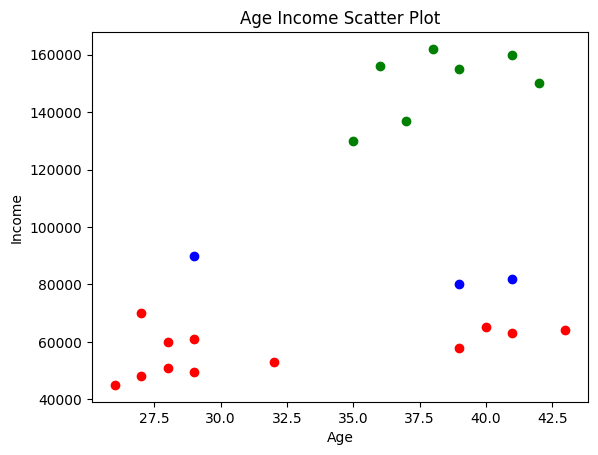

In [18]:
plt.scatter(df1.Age, df1.Income, color='red')
plt.scatter(df2.Age, df2.Income, color='green')
plt.scatter(df3.Age, df3.Income, color='blue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title("Age Income Scatter Plot")

### In above scatter plot diagram, the features are not scaled properly

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(income_df[['Income']])

MinMaxScaler()

In [21]:
income_df['Income'] = scaler.transform(income_df[['Income']])

In [22]:
income_df

,Name,Age,Income,Cluster
0,Diya Nayak,27,0.213675,0
1,Shravan Omayya,29,0.384615,2
2,Shivam Pandey,29,0.136752,0
3,Bhakti Paradkar,28,0.128205,0
4,Omkar Pashte,42,0.897436,1
5,Akshata Patil,39,0.940171,1
6,Shubham Pawar,41,0.982906,1
7,Sumit Phadke,38,1.000000,1
8,Niraj Phafat,36,0.948718,1
9,Siddhant Puthran,35,0.726496,1


In [23]:
scaler.fit(income_df[['Age']])

MinMaxScaler()

In [24]:
income_df['Age'] = scaler.transform(income_df[['Age']])

In [25]:
income_df

,Name,Age,Income,Cluster
0,Diya Nayak,0.058824,0.213675,0
1,Shravan Omayya,0.176471,0.384615,2
2,Shivam Pandey,0.176471,0.136752,0
3,Bhakti Paradkar,0.117647,0.128205,0
4,Omkar Pashte,0.941176,0.897436,1
5,Akshata Patil,0.764706,0.940171,1
6,Shubham Pawar,0.882353,0.982906,1
7,Sumit Phadke,0.705882,1.000000,1
8,Niraj Phafat,0.588235,0.948718,1
9,Siddhant Puthran,0.529412,0.726496,1


In [37]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(income_df[['Age','Income']])
y_predict
income_df['Cluster']=y_predict
income_df

,Name,Age,Income,Cluster
0,Diya Nayak,0.058824,0.213675,0
1,Shravan Omayya,0.176471,0.384615,0
2,Shivam Pandey,0.176471,0.136752,0
3,Bhakti Paradkar,0.117647,0.128205,0
4,Omkar Pashte,0.941176,0.897436,2
5,Akshata Patil,0.764706,0.940171,2
6,Shubham Pawar,0.882353,0.982906,2
7,Sumit Phadke,0.705882,1.000000,2
8,Niraj Phafat,0.588235,0.948718,2
9,Siddhant Puthran,0.529412,0.726496,2


In [38]:
df1 = income_df[income_df.Cluster == 0]
df2 = income_df[income_df.Cluster == 1]
df3 = income_df[income_df.Cluster == 2]

In [39]:
df1

,Name,Age,Income,Cluster
0,Diya Nayak,0.058824,0.213675,0
1,Shravan Omayya,0.176471,0.384615,0
2,Shivam Pandey,0.176471,0.136752,0
3,Bhakti Paradkar,0.117647,0.128205,0
11,Raj Rathod,0.000000,0.000000,0
12,Sujit Sahu,0.058824,0.025641,0
13,Mitali Salunkhe,0.117647,0.051282,0
14,Siddhi Shah,0.176471,0.038462,0
15,Ashish Sharma,0.352941,0.068376,0


In [40]:
df2

,Name,Age,Income,Cluster
16,Azad sharma,0.823529,0.170940,1
17,Hardik Shetty,0.882353,0.153846,1
18,Rishabh Shirke,1.000000,0.162393,1
19,Harshit Singh,0.764706,0.299145,1
20,Prerna Singh,0.882353,0.316239,1
21,Arya Sudevan,0.764706,0.111111,1


In [41]:
df3

,Name,Age,Income,Cluster
4,Omkar Pashte,0.941176,0.897436,2
5,Akshata Patil,0.764706,0.940171,2
6,Shubham Pawar,0.882353,0.982906,2
7,Sumit Phadke,0.705882,1.000000,2
8,Niraj Phafat,0.588235,0.948718,2
9,Siddhant Puthran,0.529412,0.726496,2
10,Aditya Raj,0.647059,0.786325,2


Text(0.5, 1.0, 'Age Income Scatter Plot')

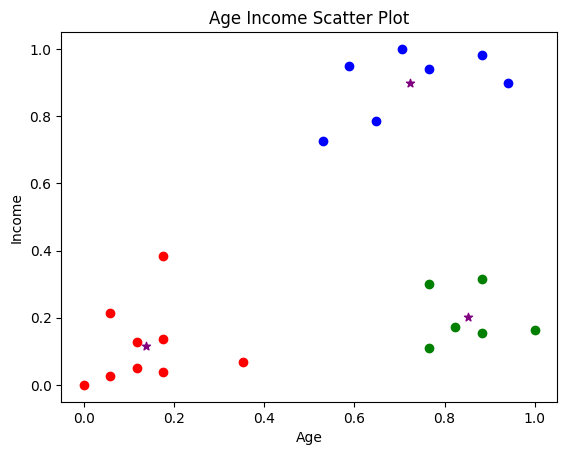

In [44]:
plt.scatter(df1.Age, df1.Income, color='red')
plt.scatter(df2.Age, df2.Income, color='green')
plt.scatter(df3.Age, df3.Income, color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1] , color = 'purple',marker="*")
plt.xlabel('Age')
plt.ylabel('Income')
plt.title("Age Income Scatter Plot")

In [43]:
kmean.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])